In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
pd.set_option('display.max_rows',16)
pd.set_option('display.max_columns',100)
plt.style.use('ggplot')

In [4]:
games = pd.read_csv("E:/Python/share/jupyter/Video_Games_Sales.csv")
print(games.shape)
games.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# total number of rows and unique rows are not same. Same title must have been released for different platform
len(games.Name.unique())

11563

In [6]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [7]:

games.dropna(axis='rows', subset=['Year_of_Release'], inplace=True)
games.Year_of_Release = games.Year_of_Release.astype(np.int64)

In [9]:
cols = ['Name','Platform','Year_of_Release','Publisher']
games.loc[games.Name=='Need for Speed: Most Wanted', cols].sort_values(['Year_of_Release'])

,Name,Platform,Year_of_Release,Publisher
253,Need for Speed: Most Wanted,PS2,2005,Electronic Arts
1591,Need for Speed: Most Wanted,X360,2005,Electronic Arts
1998,Need for Speed: Most Wanted,XB,2005,Electronic Arts
3581,Need for Speed: Most Wanted,GC,2005,Electronic Arts
5973,Need for Speed: Most Wanted,PC,2005,Electronic Arts
6411,Need for Speed: Most Wanted,DS,2005,Electronic Arts
6474,Need for Speed: Most Wanted,GBA,2005,Electronic Arts
523,Need for Speed: Most Wanted,PS3,2012,Electronic Arts
1190,Need for Speed: Most Wanted,X360,2012,Electronic Arts
2048,Need for Speed: Most Wanted,PSV,2012,Electronic Arts


Text(0, 0.5, 'Platform')

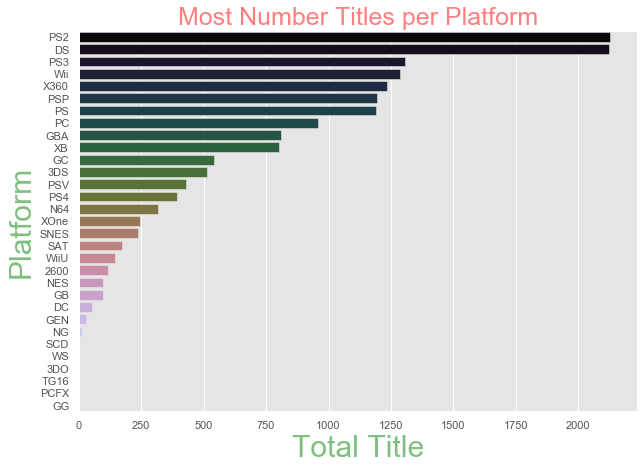

In [10]:
# Sony PS2 and Nintendo DS have almost equal number of titles. Handheld gaming is quite popular based on number of titles
platform_title = games.Platform.value_counts()

plt.subplots(figsize=(10,7))
ax = sns.barplot(x=platform_title , y=platform_title .index, palette='cubehelix')
ax.set_title('Most Number Titles per Platform', color='red', alpha=0.5, size=25)
ax.set_xlabel('Total Title', color='green', alpha=0.5, size=30)
ax.set_ylabel('Platform', color='green', alpha=0.5, size=30)

Text(0, 0.5, 'Total Number of Games')

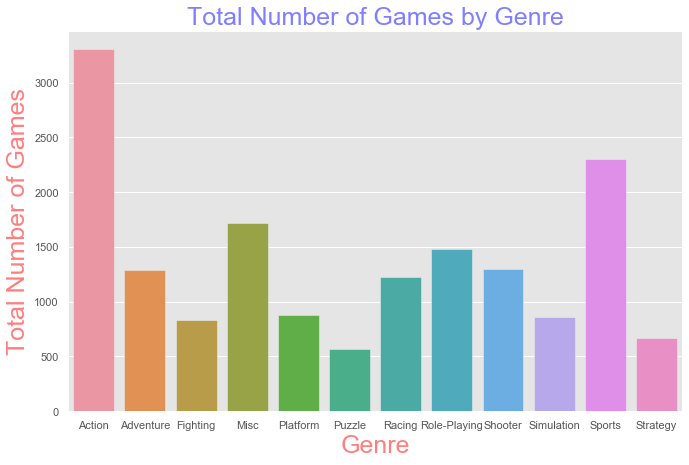

In [11]:
# games based on genre
games.reset_index()

games_by_genre = games.groupby('Genre').agg({'Genre':len})#.sort_values('Genre')
#games_by_genre = games_by_genre.rename_axis(None)
plt.subplots(figsize=(11,7))
ax = sns.barplot(x=games_by_genre.index, y=games_by_genre.Genre)
ax.set_title('Total Number of Games by Genre', color='blue', size=25, alpha=0.5)
ax.set_xlabel('Genre', color='red', size=25, alpha=0.5)
ax.set_ylabel('Total Number of Games', color='red', size=25, alpha=0.5)

Text(0, 0.5, 'Global Sales')

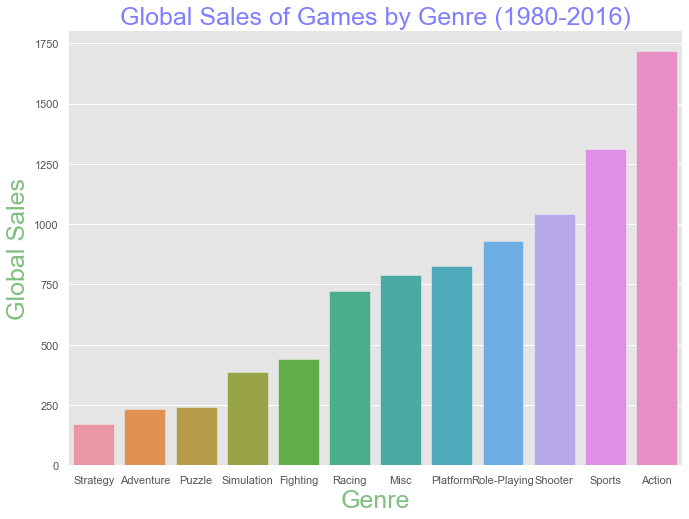

In [39]:
# Total sales based on Genre
global_sales_by_genre = games.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
plt.subplots(figsize=(11,8))
ax = sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Global_Sales)
ax.set_title('Global Sales of Games by Genre (1980-2016)', color='blue', size=25, alpha=0.5)
ax.set_xlabel('Genre', color='green', size=25, alpha=0.5)
ax.set_ylabel('Global Sales', color='green', size=25, alpha=0.5)

In [12]:
# These games are yet to be released in all the countries
games.loc[games.Year_of_Release > 2016, :]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Sales')

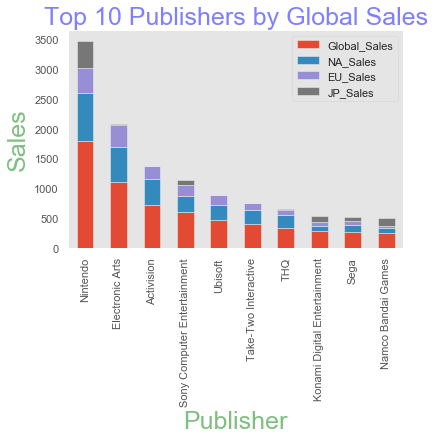

In [13]:
# Let's look at the global sales by publisher
global_sales_publisher = games.pivot_table(index=['Publisher'], values=['Global_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Global_Sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['Global_Sales','NA_Sales','EU_Sales','JP_Sales']]
ax = global_sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Publishers by Global Sales', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

Text(0, 0.5, 'Number of Titles')

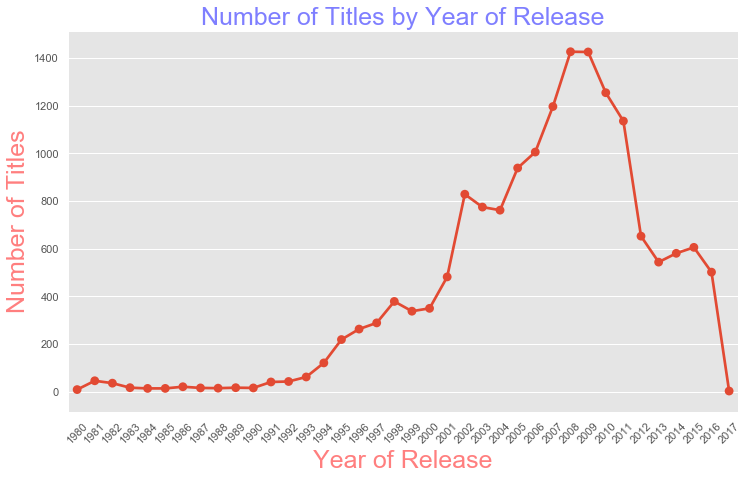

In [14]:

# Number of titles per year
titles_by_year = games.groupby(['Year_of_Release']).agg({'Name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
plt.subplots(figsize=(12,7))
ax = sns.pointplot(x=titles_by_year.index, y=titles_by_year.Name)
g = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Number of Titles by Year of Release', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Year of Release', size=25, color='red', alpha=0.5)
ax.set_ylabel('Number of Titles', size=25, color='red', alpha=0.5)

# Sales figure exploration

Text(30.5, 0.5, 'Platform')

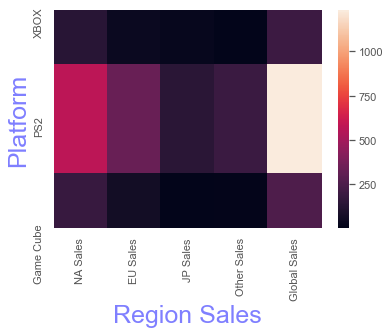

In [15]:
platform_after_2000 = games.loc[(games.Platform == 'PS2') | (games.Platform == 'XB') | (games.Platform == 'GC'),:]
platform_after_2000 = platform_after_2000.groupby(['Platform']).agg(np.sum)

ax = sns.heatmap(platform_after_2000.iloc[:, 1:6])
ax.set_yticklabels(['XBOX', 'PS2', 'Game Cube'])
ax.set_xticklabels(['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales', 'Global Sales'])
ax.set_xlabel('Region Sales', size=25, color='blue', alpha=0.5)
ax.set_ylabel('Platform', size=25, color='blue', alpha=0.5)

# #comparing the sales of PS2, XBOX, Game Cube from 2001 to 2009.

Text(30.5, 0.5, 'Platform')

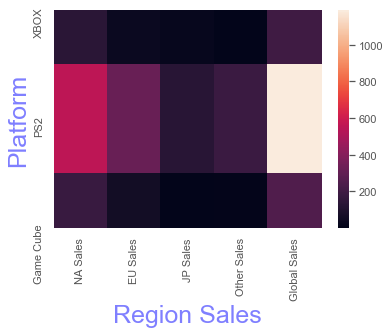

In [16]:
platform_after_2000_2009 = games.loc[((games.Platform == 'PS2') | (games.Platform == 'XB') | (games.Platform == 'GC')) & 
                                     ((games.Year_of_Release >= 2001) & (games.Year_of_Release <= 2009)),:]
platform_after_2000_2009 = platform_after_2000_2009.groupby(['Platform']).agg(np.sum)

ax = sns.heatmap(platform_after_2000_2009.iloc[:, 1:6])
ax.set_yticklabels(['XBOX', 'PS2', 'Game Cube'])
ax.set_xticklabels(['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales', 'Global Sales'])
ax.set_xlabel('Region Sales', size=25, color='blue', alpha=0.5)
ax.set_ylabel('Platform', size=25, color='blue', alpha=0.5)

# PREDICTING GLOBAL SALES

In [49]:
# MODEL BUILDING FOR PREDICTING FUTURE GLOBAL SALES
# dropping column
data = games.copy()
data.drop(["NA_Sales","EU_Sales","JP_Sales","Other_Sales"],axis = 1,inplace = True)

In [52]:
def data_encode(x_data):
    for i in x_data.columns:
        x_data[i]=x_data[i].factorize()[0]
        
    return x_data    
    
x_data = data.drop("Global_Sales",axis = 1)
y_data = data["Global_Sales"]
x_data = data_encode(x_data)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=.3,random_state=1)

In [55]:
rf_model = RandomForestRegressor(n_estimators=200,min_samples_split=20,random_state=43)
rf_model.fit(xtrain,ytrain)
ypred = rf_model.predict(xtest)
n = len(xtest)
p = xtest.shape[1]
r2_value = r2_score(ytest,ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
print("r2_score for Random Forest Reg model : ",r2_score(ytest,ypred))
print("adjusted_r2_score Value              : ",adjusted_r2_score)
print("MSE for Random Forest Regression     : ",mean_squared_error(ytest,ypred))

r2_score for Random Forest Reg model :  0.8665971635912983
adjusted_r2_score Value              :  0.8662990869712505
MSE for Random Forest Regression     :  0.26091912389198024


# K-Means Clustering 

In [58]:
nullRemoved = data.dropna(axis=0) #6825 observations with no nulls
# Convert to int
nullRemoved = nullRemoved.astype({'User_Score':float})

In [ ]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder # scaling data for pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer # apply scaling to dataset
from sklearn.pipeline import make_pipeline # create pipeline for data processing
from sklearn.ensemble import RandomForestClassifier # classification model
from sklearn.cluster import KMeans 

In [62]:
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "AO", "Rating"] = "M"
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "K-A", "Rating"] = "E"
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "RP", "Rating"] = "T"
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "E10+", "Rating"] = "E"


In [63]:
target =  nullRemoved[['Global_Sales']].values #y
features = nullRemoved[['Platform','Genre','Critic_Score','Critic_Count','User_Score','User_Count','Rating']] #X

In [64]:
preprocess = make_column_transformer(
    (StandardScaler(), ['Critic_Score', 'Critic_Count','User_Score','User_Count' ]), #features scale
    (OneHotEncoder(), ['Platform', 'Genre', 'Rating']) #OHE categorical features
)


In [65]:
kmeans_features = preprocess.fit_transform(features).toarray()

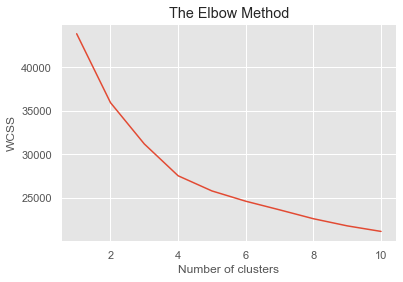

In [68]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(kmeans_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()  #4 is ideal number of clusters

In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [70]:
#considering cluster no=4 from elbow method
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 69)
y_kmeans = kmeans.fit_predict(kmeans_features)

In [90]:
target=(target > .5).astype(int)

In [71]:
features = features.assign(Kmeans_labels=pd.Series(y_kmeans, index=features.index))

In [91]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

# Classification

In [92]:
from sklearn.linear_model import LogisticRegression 
model= make_pipeline(
     preprocess,
    LogisticRegression(solver='lbfgs',penalty='l2'))
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
print("Logistic Regression Score: %f" % model.score(X_test, y_test))


Logistic Regression Score: 0.785589


In [94]:
BothProbabilities = model.predict_proba(features)
probabilities = BothProbabilities[:,1]

In [93]:
model2 = make_pipeline(
        preprocess,
        RandomForestClassifier(n_estimators=100))
model2.fit(X_train, y_train.ravel())
y_pred2 = model2.predict(X_test)
print("\nRandom Forest Score: %f" % model2.score(X_test, y_test)) 


Random Forest Score: 0.814880


In [96]:
BothProbabilities2 = model2.predict_proba(features)
probabilities2 = BothProbabilities2[:,1]

In [97]:
#Making confusion matrix by considering RandomForestClassifier Model because of better accuracy
cm2 = confusion_matrix(y_test, y_pred2)
print ('\nRandom Forest Confusion Matrix and Metrics')
Threshold = 0.01 # Some number between 0 and 1
print ("Probability Threshold is chosen to be:", Threshold)
predictions = (probabilities2 > Threshold).astype(int)
tn, fp, fn, tp = cm2.ravel()
print ("TP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred2))
print("\nPrecision:",metrics.precision_score(y_test, y_pred2))
print("\nRecall:",metrics.recall_score(y_test, y_pred2))
print("\nF1:",metrics.f1_score(y_test, y_pred2))
print("\nAverage precision-recall score:",metrics.average_precision_score(y_test, y_pred2))


Random Forest Confusion Matrix and Metrics
Probability Threshold is chosen to be: 0.01
TP, TN, FP, FN: 400 , 991 , 119 , 197

Accuracy: 0.814879906268307

Precision: 0.7707129094412332

Recall: 0.6700167504187605

F1: 0.7168458781362008

Average precision-recall score: 0.6317977061311969


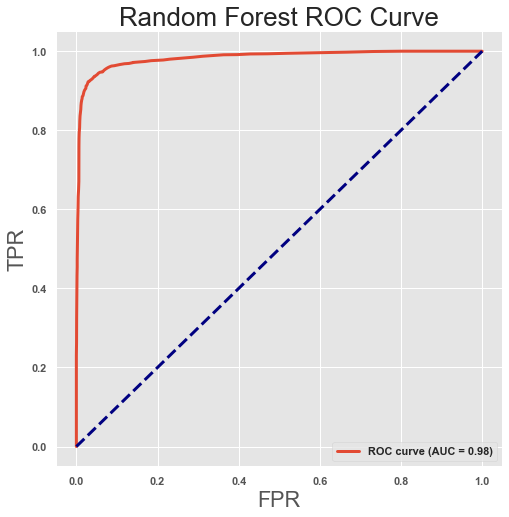

In [98]:
fpr, tpr, th = roc_curve(target, probabilities2)
AUC = auc(fpr, tpr)

plt.rcParams["figure.figsize"] = [8, 8] # Square
font = {'weight' : 'bold', 'size' : 18}
matplotlib.rc('font', **font)
plt.figure()
plt.title('Random Forest ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")
plt.show() #ideal threshold is around 0.1